# Motivation

## NYPD Arrests Data (Historic)

Our dataset for this analysis is the [_*NYPD Arrests Data*_](https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u), which consists of _4.551.566_ rows and _18_ columns. Each row represents a crime incident, which has 18 different attributes. Many of these attributes are id's or classification codes for organization purposes. The ones that really mattter for our analysis and thus we kept are (the names are changed on purporse so they are intuitively understood by the reader):

* **Arrest Date**
* **Crime Description** (Classification of crime)
* **Borough**
* **Age Group**
* **Gender**
* **Race**
* **Latitude**
* **Longitude**

New York is a global metropolis with total population of almost 9 million people. Naturally there are many approaches on analysing demographics and getting insights not only for the whole city, but also for each one of its five boroughs _(Bronx, Staten Island, Brooklyn, Manhattan and Queens)_. We have chosen to analyze the demographics of crime evolution in the city and in [NYC Open Data](https://opendata.cityofnewyork.us/) we found just what we needed. That is because it is a massive dataset of crime incidents with historical data of more than ten years (2006 - 2017), which apart from the time, place and kind of crime that was commited, also includes perpetrator demographics.

The optimal scenario is that we produce a quiality reader-driven poster. This means that the reader/user of our observable will be able to get involved, explore and get insights about the evolution of crime demographics in New York, very intuitively by the use of available interactions and with very little guidance or text.

>Importing relevant python packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

# Basic Stats

## Data Cleaning and Pre-processing

### 1. First look
>Let's start by the size of our dataset. It is quite a big one as it has 4.551.566 ros and 18 columns. This is 81.928.188 elements in total!

In [2]:
raw_data = pd.read_csv("nyc.csv")
raw_data.shape

(4551566, 18)

>Now let's take a look at how it actually looks like.

In [3]:
raw_data.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241


### 2. Get rid of the irrelevant columns. Replace column names with more intuitive ones
>You can see that very few of the column names actually make sense. With a little help from the [_*NYPD Arrests Data*_](https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u) documentation we understood that many of these attributes are id's or classification codes for organization purposes. 
As mentioned before this analysis is supposed to have a demographical flavor, so most of these columns are redundant and that is why we the first preprocessing task is to get rid of them and keep only the relevant ones (see below).

In [4]:
new_columns = ['ARREST_DATE', 'OFNS_DESC', 'ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'Latitude', 'Longitude']
raw_data = raw_data[new_columns]
# give to our columns more intuitive names
raw_data.columns = ['ARREST_DATE', 'CRIME_TYPE', 'BOROUGH', 'AGE_GROUP', 'GENDER', 'RACE', 'LATITUDE', 'LONGITUDE']
print (list(raw_data.columns))

['ARREST_DATE', 'CRIME_TYPE', 'BOROUGH', 'AGE_GROUP', 'GENDER', 'RACE', 'LATITUDE', 'LONGITUDE']


### 3. Too many crime types spoil the broth: Selecting the focuscrimes
>As you can see below, there are as many as 72 crime types. By further analysis we see that the first 20 out of 72 crime types correspond to more than 90% of all crimes in the dataset. Since this is a huge one, we can live with this tradeoff, so we only keep the first 20 as our focuscrimes.

>New dataset size: 4.138.649 rows and 8 columns.

In [5]:
crimes = raw_data.CRIME_TYPE.value_counts() # create a pandas series to get all the crime types in a descending order,
                                           # based on their occurences.

print (f"There are {len(crimes)} crime types in total in the dataset.")

#number of crime types to be kept
num = 20 
#sum of all crime types in the dataset
total_sum = sum(crimes.values)
# sum of selected crime types in the dataset
focuscrimes_sum = sum(crimes.values[0:num])
# how much the selected crime types contribute to the sum of all crime types
focuscrimes_percent = round((focuscrimes_sum/total_sum)*100)

# print the selected crime types contribution
print (f"\n{num} focuscrimes make for {focuscrimes_percent}% of all crimes in the dataset.")

# create the focuscrimes list, which contains only the selected crime types
focuscrimes = list(crimes.index[0:num])
# 
new_data = raw_data[raw_data.CRIME_TYPE.isin(focuscrimes)]

print (f"\nAfter keeping the selected crime types, the dataset consists of {new_data.shape[0]} rows and {new_data.shape[1]} columns.")

There are 72 crime types in total in the dataset.

20 focuscrimes make for 91.0% of all crimes in the dataset.

After keeping the selected crime types, the dataset consists of 4138649 rows and 8 columns.


### 4. Removing weird values from the AGE_GROUP column

> While working with the visualizations we bumped into some weird values on the AGE_GROUP column. Being very few comparing to the dataset size, we removed the corresponding incidents from the dataset. Below you can see what these weird values look like and then what values the final AGE_GROUPS column consists of.

In [6]:
# as you can see below the 'AGE_GROUP' column contains several values, which do not make sense.
print (set(new_data.AGE_GROUP))

{nan, '446', '709', '949', '309', '338', '936', '25-44', '1048', '65+', '317', '640', '934', '1918', '947', '910', '924', '937', '926', '932', '1922', '352', '894', '18-24', '940', '316', '1942', '812', '895', '942', '896', '1916', '956', '929', '945', '339', '935', '740', '931', '194', '927', 'UNKNOWN', '925', '<18', '808', '920', '708', '1928', '944', '212', '909', '939', '1024', '943', '330', '314', '928', '938', '1042', '954', '816', '320', '921', '45-64', '2000', '930', '965', '237', '231', '922', '946', '955', '1953', '959', '912', '723', '323', '1937', '941', '952', '948', '933', '1018', '1947', '2007', '923', '951'}


In [7]:
# we get rid of those
valid_ages = set(['<18', '18-24', '25-44', '45-64', '65+'])
new_data2 = new_data[(new_data.AGE_GROUP.isin(valid_ages))]
print (set(new_data2.AGE_GROUP))

{'65+', '25-44', '<18', '18-24', '45-64'}


### 5. But are there any Nan values?

>Next we want to check how many NaN values there are in our dataset and maybe delete those too. We will check this for every distinct column

In [8]:
# time to check how many nan values there are per column and get rid of them.
for column in new_data2.columns:
    test_data = new_data2.dropna(subset=[column])
    nan_count = len(new_data2) - len(test_data)
    print (f"Column {column} has {nan_count} Nan values.")

Column ARREST_DATE has 0 Nan values.
Column CRIME_TYPE has 0 Nan values.
Column BOROUGH has 7 Nan values.
Column AGE_GROUP has 0 Nan values.
Column GENDER has 0 Nan values.
Column RACE has 0 Nan values.
Column LATITUDE has 1 Nan values.
Column LONGITUDE has 1 Nan values.


>9 Nan values in total are not much at all and it's time we let them go.

In [9]:
# get rid of all nan values
data_final = new_data2.dropna() # letting go all the rows with at least one NaN value in our dataset.
for column in data_final.columns:
    test_data = data_final.dropna(subset=[column])
    nan_count = len(test_data) - len(data_final)
    print (f"Column {column} has {nan_count} Nan values.")

Column ARREST_DATE has 0 Nan values.
Column CRIME_TYPE has 0 Nan values.
Column BOROUGH has 0 Nan values.
Column AGE_GROUP has 0 Nan values.
Column GENDER has 0 Nan values.
Column RACE has 0 Nan values.
Column LATITUDE has 0 Nan values.
Column LONGITUDE has 0 Nan values.


### 6. Convert string type dates to datetime objects
> In general dealing with dates can be tricky, but converting them to datetime objects makes our life much easier. Since this conversion demands traversing all the dataset's rows, we kept it as last one, so the dataset is already reduced in size from the previous steps. 

In [10]:
# lastly we convert the dates from strings to datetime objects 
data_final['ARREST_DATE'] = pd.to_datetime(data_final['ARREST_DATE'])

In [19]:
# check what years are included in our dataset
years = set()
for date in set(data_final['ARREST_DATE']):
    years.add(date.year)
years = list(map(str, sorted(list(years))))
print (years)

['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


In [20]:
data_final.head(3)

,ARREST_DATE,CRIME_TYPE,BOROUGH,AGE_GROUP,GENDER,RACE,LATITUDE,LONGITUDE
0,2017-12-31,MISCELLANEOUS PENAL LAW,Q,25-44,M,BLACK,40.735772,-73.715638
1,2017-12-31,OTHER OFFENSES RELATED TO THEFT,Q,25-44,M,ASIAN / PACIFIC ISLANDER,40.769437,-73.910241
2,2017-12-31,OTHER STATE LAWS,K,18-24,M,BLACK,40.679525,-73.904572


# Data Analysis

>Before diving into the d3.js visualizations we fisrt did some data analysis and vizualization with python, to get some insight about the data and also take ideas about the interactive visualizations we can do with Javascript.<br/><br/>
Firstly, we create the plot_bar function such that we easily produce some of the following visualizations.

In [21]:
def plot_bar(one_dict, one_list, rows, cols):
    #create the subplot
    fig, axes = plt.subplots(rows, cols, sharex=True, figsize=(15,10))

    # Here we set the maximum number of labels we want in the x and y axis respectively.
#     for axi in axes.flat:
#         axi.xaxis.set_major_locator(plt.MaxNLocator(8))
#         axi.yaxis.set_major_locator(plt.MaxNLocator(4))

    #Populate each subplot with a barchart of certain properties  
    i = 0
    for row in range(0,rows):
        for col in range(0,cols):
            #create barchart
            bar = axes[row,col].bar(one_list, one_dict[list(one_dict.keys())[i]])
            #Put incident title as text inside each frame.
            axes[row,col].text(0.05, 0.9, list(one_dict.keys())[i], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[row,col].transAxes)
            #Set margin
            axes[row,col].margins(x=0.04, y=0.2)
            i+=1 #Iterate through the dictionary values, which are lists containing the number of incidents per year.

    plt.show()

### Evolution of crime incidents for different races

>Through the following plot we can see that races like _Black_ and _White Hispanic_ have a decreasing trend in terms of the amount of incidents through the years. _Pacific islanders_ on the other hand seem to have a small increase. Notice that every subplot has a different scale in the y-axis, which shows that different races have higher, or lower amount of incidents in general.

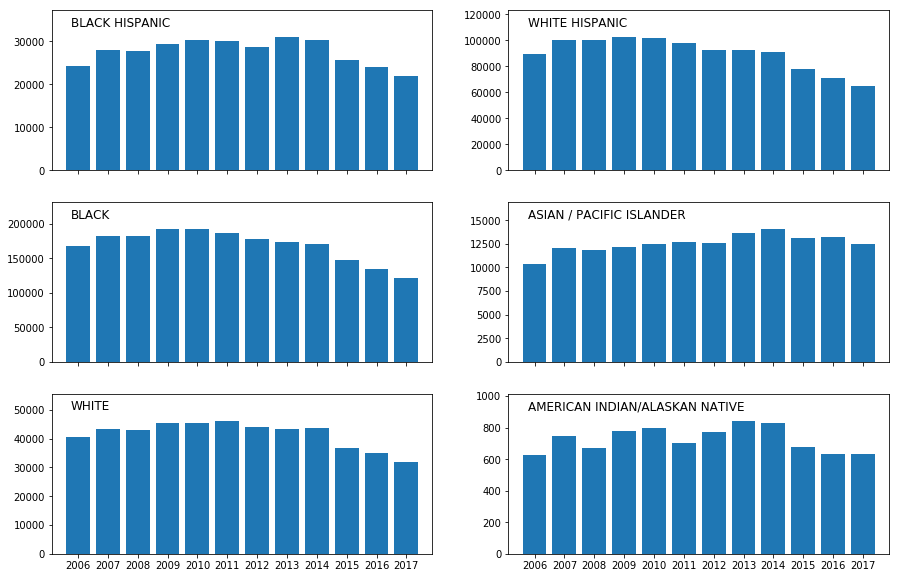

In [22]:
data = data_final.set_index('ARREST_DATE')

races = set(data.RACE)
races.remove('OTHER')
races.remove('UNKNOWN')

race_dict = {}
for race in races:
    df = data[(data.RACE==race)]
    df = df.groupby(df.index.year).size()
    race_dict[race] = list(df)

plot_bar(race_dict, years, 3, 2)

### Evolution of crime incidents for different age groups

>Through this plot we can see a really interesting decrease through the years, in the number of incidents regarding underaged perpetrators. 25-44, which is the most highly crime-related agegroup, also has a decreasing trend, while 65+ people seem to get more involved in criminal activities as years go passing by.

IndexError: list index out of range

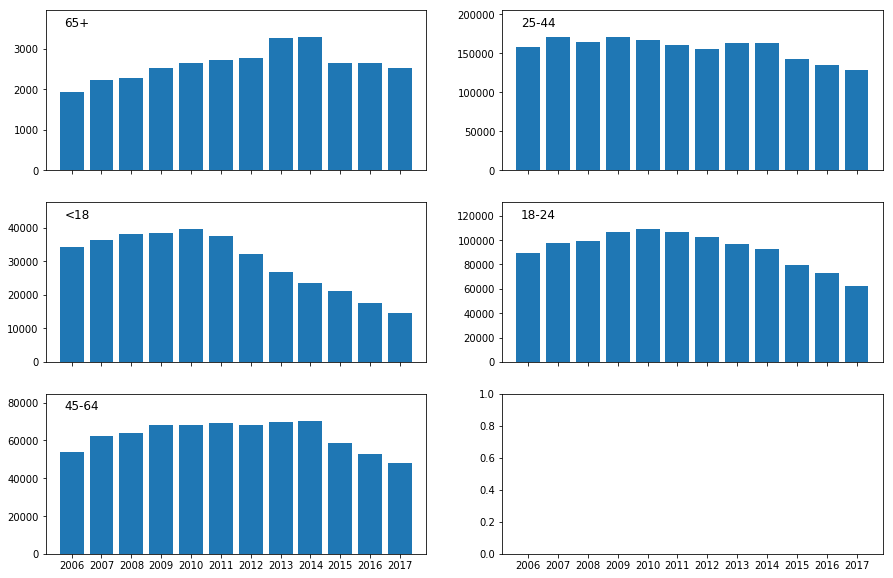

In [23]:
age_groups = set(data.AGE_GROUP)

age_dict = {}
for age in age_groups:
    df = data[(data.AGE_GROUP==age)]
    df = df.groupby(df.index.year).size()
    age_dict[age] = list(df)

plot_bar(age_dict, years, 3, 2)

### Grouped Barcharts

>Grouped or stacked barcharts, visually give very interesting information in terms of the distribution of genders, races etc, for each of the different boroughs or the different focuscrimes. Below we create four such plots that as you will see, focus on the race and gender of the perpetrators.

In [15]:
def plot_chart(one_dict, color_dict, one_list):
    N = len(one_list)
    ind = np.arange(N)
    width = 0.6
    plot_race_data = list(data_dict.values())

    bottom = np.zeros(N)

    plt.figure(figsize=(10,10))
    for elem, color in zip(plot_race_data,list(color_dict.keys())):
        plt.bar(ind, elem, width, bottom=bottom, color=color, label=color_dict[color])
        plt.legend(prop={'size': 12})
        bottom+=elem
    x = plt.xticks(np.arange(20,step=1),one_list, rotation='vertical',fontsize=11)
    plt.savefig('chart.png')

>___Races distribution per borough___<br/>
By looking at this graph, we can see not only the distribution of races per focuscrime, but also the incidents per focuscrime themeselves in a descending order. Same case with the following graph.

In [16]:
#create grouped barchart with different race for each crime
data_dict = {'WHITE':[], 'WHITE HISPANIC':[], 'BLACK':[], 'BLACK HISPANIC':[], 'ASIAN / PACIFIC ISLANDER':[],
             'AMERICAN INDIAN/ALASKAN NATIVE':[], 'UNKNOWN':[], 'OTHER':[]}

color_dict = {}
colors = ['wheat', 'darkorange', 'k', 'brown', 'yellow', 'red', 'grey', 'lightgrey']
for race,color in zip(data_dict.keys(),colors):
    color_dict[color] = race

for crime in focuscrimes:
    new_data = data_final[(data_final.CRIME_TYPE==crime)]
    grouped = dict(new_data.groupby('RACE').RACE.count())
    for key in grouped.keys():
        data_dict[key].append(grouped[key])

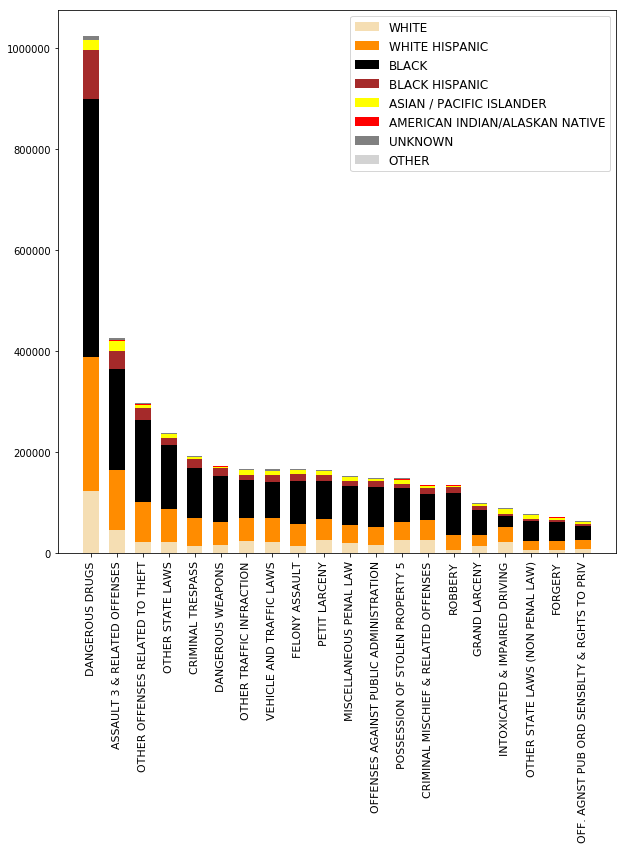

In [17]:
plot_chart(data_dict, color_dict, focuscrimes)

>___Gender distribution per crime___

In [220]:
# create grouped barchart with different gender for each crime
data_dict = {'M':[], 'F':[]}

color_dict = {'b':'Male', 'pink':'Female'}

for crime in focuscrimes:
    new_data = data_final[(data_final.CRIME_TYPE==crime)]
    grouped = dict(new_data.groupby('GENDER').GENDER.count())
    for key in grouped.keys():
        data_dict[key].append(grouped[key])

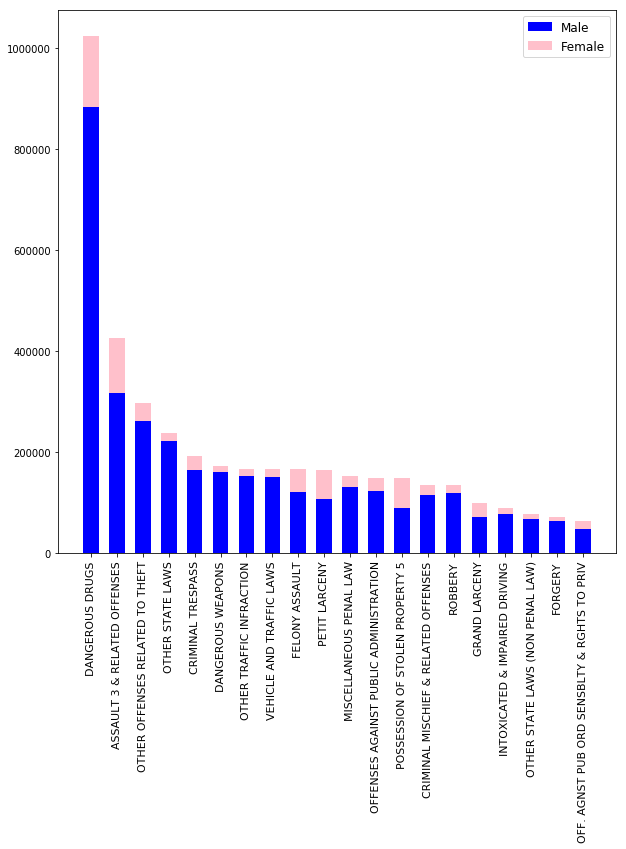

In [221]:
plot_chart(data_dict, color_dict, focuscrimes)

>___Races distribution per borough___<br/>
By looking at this graph, we can see not only the distribution of genders per borough, but also the incidents per borough themeselves in a descending order. Same case with the following graph.

In [222]:
# create grouped barchart with different race for each boro
boroughs_dict = {'K':'Brooklyn', 'M':'Manhattan', 'B':'Bronx', 'Q':'Queens', 'S':'Staten Island'}
boroughs = list(data_final.groupby('BOROUGH').BOROUGH.count().sort_values(ascending=False).index)
boroughs_names = [boroughs_dict[boro] for boro in boroughs]

data_dict = {'WHITE':[], 'WHITE HISPANIC':[], 'BLACK':[], 'BLACK HISPANIC':[], 'ASIAN / PACIFIC ISLANDER':[],
             'AMERICAN INDIAN/ALASKAN NATIVE':[], 'UNKNOWN':[], 'OTHER':[]}

color_dict = {}
colors = ['wheat', 'darkorange', 'k', 'brown', 'yellow', 
          'red', 'grey', 'lightgrey']
for race,color in zip(data_dict.keys(),colors):
    color_dict[color] = race

for boro in boroughs:
    new_data = data_final[(data_final.BOROUGH==boro)]
    grouped = dict(new_data.groupby('RACE').RACE.count())
    for key in data_dict.keys():
        data_dict[key].append(grouped[key])

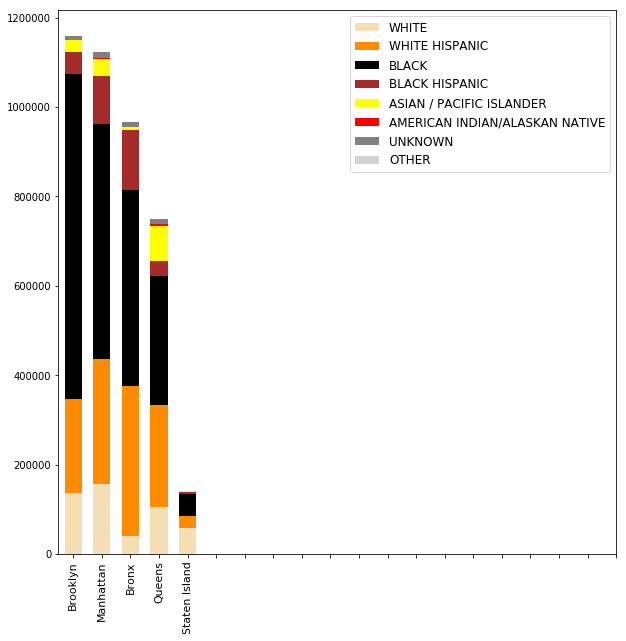

In [223]:
plot_chart(data_dict, color_dict, boroughs_names)

>___Gender distribution per borough___

In [224]:
# create grouped barchart with different sex for each boro
boroughs_dict = {'K':'Brooklyn', 'M':'Manhattan', 'B':'Bronx', 'Q':'Queens', 'S':'Staten Island'}
boroughs = list(data_final.groupby('BOROUGH').BOROUGH.count().sort_values(ascending=False).index)
boroughs_names = [boroughs_dict[boro] for boro in boroughs]

data_dict = {'M':[], 'F':[]}

color_dict = {'b':'Male', 'pink':'Female'}
        
for boro in boroughs:
    new_data = data_final[(data_final.BOROUGH==boro)]
    grouped = dict(new_data.groupby('GENDER').GENDER.count())
    for key in data_dict.keys():
        data_dict[key].append(grouped[key])

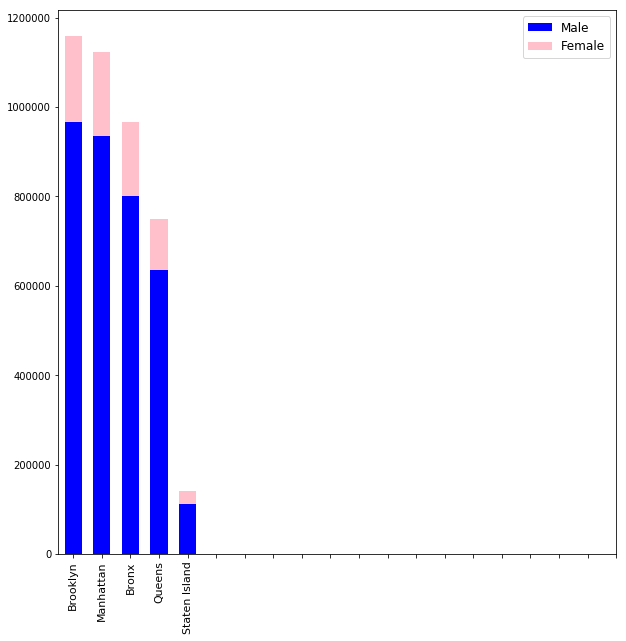

In [225]:
plot_chart(data_dict, color_dict, boroughs_names)

# Dataset Creation
>## 1st level datasets<br/>
>The following function returns a dataframe so that we can see the created dataset and also creates the corresponding .csv. This dataset contains the number of incidents based on two attributes (eg. incidents for RACE per ARREST_DATE). For example an element of this dataset could be described as the number of Hispanics commited a crime in year 2006 etc.

In [30]:
def csv_for_two_attributes(attribute1, attribute2, df):
    # make attribute1 the index of the df
    new_index_df = df.set_index(attribute1)
    # create dataframe, which contains number of incidents for attribute2 per attribute1
    if attribute1 == 'ARREST_DATE':
        dataframe = new_index_df.groupby([new_index_df.index.year, attribute2]).size().unstack(level=1)
    else:
        dataframe = new_index_df.groupby([attribute1, attribute2]).size().unstack(level=1)
    
    # create a list with the total number of incidents per row
    total = []
    for _, row in dataframe.iterrows():
        total.append(row.sum())
    
    # add a new column 'Total' to the columns of the existing df
    dataframe['Total'] = total
    
    # replace possible nan values of a dataframe with zeros, so that all values are valid for the visualizations.
    dataframe = dataframe.fillna(0)
    
    # create the csv file
    dataframe.to_csv(attribute2+'_per_'+attribute1+'.csv')
    
    return dataframe

In [31]:
df1 = csv_for_two_attributes('ARREST_DATE', 'BOROUGH', data_final)

>## 2nd level datasets<br/>
>Create .csv and return dataframe with number of incidents based on three attributes (eg. incidents for RACE per ARREST_DATE per Borough). For example, an element of this dataset could be how many Hispanics commited a crime in 2006 in Bronx etc.

In [15]:
def csv_for_three_attributes(attribute1, attribute2, attribute3, df):
    # make attribute1 the index of the df
    new_index_df = df.set_index(attribute1)
    
    if attribute1== 'ARREST_DATE':
        dataframe = new_index_df.groupby([new_index_df.index.year, attribute2, attribute3]).size().unstack(level=2)
    else:
        dataframe = new_index_df.groupby([attribute1, attribute2, attribute3]).size().unstack(level=2)
    
    # create a list with the total number of incidents per row
    total = []
    for _, row in dataframe.iterrows():
        total.append(row.sum())
    
    # add a new column 'Total' to the columns of the existing df
    dataframe['Total'] = total
    
    # replace possible nan values of a dataframe with zeros, so that all values are valid for the visualizations.
    dataframe = dataframe.fillna(0)
    
    # create the csv file
    dataframe.to_csv(attribute3+'_per_'+attribute1+'_per_'+attribute2+'.csv')
    
    return dataframe

In [18]:
df2 = csv_for_three_attributes('ARREST_DATE', 'BOROUGH', 'GENDER', data_final)

>## 3rd level datasets<br/>
>Create .csv and return dataframe with number of incidents based on four attributes (eg.  incidents for RACE per ARREST_DATE per BOROUGH per GENDER). For example, an example element might indicate how many White Females commited a crime in Manhattan during 2016.

In [16]:
def csv_for_four_attributes(attribute1, attribute2, attribute3, attribute4, df):
    # make attribute1 the index of the df
    new_index_df = df.set_index(attribute1)
    
    if attribute1== 'ARREST_DATE':
        dataframe = new_index_df.groupby([new_index_df.index.year, attribute2, attribute3, attribute4]).size().unstack(level=3)
    else:
        dataframe = new_index_df.groupby([attribute1, attribute2, attribute3, attribute4]).size().unstack(level=3)
    
    # create a list with the total number of incidents per row
    total = []
    for _, row in dataframe.iterrows():
        total.append(row.sum())
    
    # add a new column 'Total' to the columns of the existing df
    dataframe['Total'] = total
    
    # replace possible nan values of a dataframe with zeros, so that all values are valid for the visualizations.
    dataframe = dataframe.fillna(0)
    
    # create the csv file
    dataframe.to_csv(attribute4+'_per_'+attribute1+'_per_'+attribute2+'_per_'+attribute3+'.csv')
    
    return dataframe

In [47]:
df3 = csv_for_four_attributes('ARREST_DATE', 'BOROUGH', 'RACE', 'GENDER', data_final)

# Genre

The genre of our visualization is a __*Poster*__. Regardless of the genre, a good practice is to maintain a balance between author-driven and read-driven format of the visualization. Due to the demographic approach that we have chosen to follow in our analysis, the format of the narrative will be _purely reader-driven_. A purely reader-driven approach has no prescribed ordering of images, no messaging, and a high degree of interactivity. That is why we have chosen the following tools:<br/>

___Visual Narrative___<br/>
>_Visual Structuring_<br/>
* Consistent Visual Platform
* Progress bar/timebar


___Narrative Structure___<br/>
>_Ordering_<br/>
* Random Access

>_Interactivity_<br/>
* Hover Highlighting/Details
* Filtering

# Visualizations

Our visualizations start with a ___Map___ followed by two ___Barcharts___ and a ___PieChart___.

#### Map
The map is produced with New York Geodata which bisect the city to its five major boroughs. The interactivity features provided by this visualization are a slider which functions as a timebar, as well as on demand details (borough name, number of crime incidents) everytime the mouse hovers above a borough.


#### Barcharts
The two barcharts visualize the distribution of crime incidents per race and crime incidents per age group respectively. The interactivity feature is a timebar, which lets the user see the shape of these distribution for every different year.



##### Piechart
Lastly the piechart graph was used for the visualization of crime incidents per gender. Since there are two genders in our dataset, a barchart would be an overkill. The interactivity feature here is also a slider that lets the user change between the different years in the dataset and see the corresponding share of males and females on crime incidents.


A reader-driven approach supports tasks such as data diagnostics, pattern discovery,
and hypothesis formation.

In [105]:
# #create the subplot
# fig, axes = plt.subplots(3, 2, sharex=True, figsize=(15,10))

# # Here we set the maximum number of labels we want in the x and y axis respectively.
# for axi in axes.flat:
#     axi.xaxis.set_major_locator(plt.MaxNLocator(8))
#     axi.yaxis.set_major_locator(plt.MaxNLocator(4))
    
# #Populate each subplot with a barchart of certain properties  
# i = 0
# for row in range(0,3):
#     for col in range(0,2):
#         #create barchart
#         bar = axes[row,col].bar(years, race_dict[list(race_dict.keys())[i]])
#         #Put incident title as text inside each frame.
#         axes[row,col].text(0.05, 0.9, list(race_dict.keys())[i], #title taken from the respective dict
#                                            horizontalalignment='left',           
#                                            fontsize=12,
#                                            transform=axes[row,col].transAxes)
#         #Set margin 
#         axes[row,col].margins(x=0.04, y=0.2)
#         i+=1 #Iterate through the dictionary values, which are lists containing the number of incidents per year.

# plt.show()

In [69]:
# data_final = data_final.reset_index(drop=True)
# sort_by_date = data_final.sort_values(by='ARREST_DATE').set_index('ARREST_DATE')
# master_data = sort_by_date.groupby([sort_by_date.index.year, 'ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'OFNS_DESC']).size().to_frame()
# master_data.to_csv('final_data.csv')
# grouped_by_crime = sort_by_date.groupby(['OFNS_DESC']).size().to_frame()
# grouped_by_crime.to_csv('data_crimes2.csv')